In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks'
%ls

/content/drive/MyDrive/Colab Notebooks
 adhd_predictions.csv    'March Madness Machine Learning'
 gender_predictions.csv   widsdatathon2025.zip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
import zipfile
import os

# Path to the ZIP file inside Google Drive
zip_path = "/content/drive/My Drive/Colab Notebooks/widsdatathon2025.zip"
extract_path = "/content/extracted"

# Create directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to {extract_path}")

Files extracted to /content/extracted


In [ ]:
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))

/content/extracted/SAMPLE_SUBMISSION.xlsx
/content/extracted/Data Dictionary.xlsx
/content/extracted/TEST/TEST_QUANTITATIVE_METADATA.xlsx
/content/extracted/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/content/extracted/TEST/TEST_CATEGORICAL.xlsx
/content/extracted/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv
/content/extracted/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx
/content/extracted/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx
/content/extracted/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx
/content/extracted/TRAIN_OLD/TRAINING_SOLUTIONS.xlsx
/content/extracted/TRAIN_OLD/TRAIN_CATEGORICAL_METADATA.xlsx
/content/extracted/TRAIN_OLD/TRAIN_QUANTITATIVE_METADATA.xlsx
/content/extracted/TRAIN_OLD/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv


In [ ]:
# Load training data
train_connectome = pd.read_csv("/content/extracted/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
train_categorical = pd.read_excel("/content/extracted/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx")
train_quantitative = pd.read_excel("/content/extracted/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx")

# load data dictionary
data_dictionary = pd.read_excel("/content/extracted/Data Dictionary.xlsx")

# Load test data
test_connectome = pd.read_csv("/content/extracted/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
test_categorical = pd.read_excel("/content/extracted/TEST/TEST_CATEGORICAL.xlsx")
test_quantitative = pd.read_excel("/content/extracted/TEST/TEST_QUANTITATIVE_METADATA.xlsx")

# Load target labels
train_labels = pd.read_excel("/content/extracted/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx")

# Display first few rows
train_connectome.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [ ]:
print("Connectome Data:")
print(train_connectome.info())

print("\nCategorical Metadata:")
print(train_categorical.info())

print("\nQuantitative Metadata:")
print(train_quantitative.info())

print("\nTraining Labels:")
print(train_labels.info())

Connectome Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB
None

Categorical Metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2

In [ ]:
# Check for missing values
print("Missing values in train_connectome:\n", train_connectome.isnull().sum().sum())
print("Missing values in train_categorical:\n", train_categorical.isnull().sum().sum())
print("Missing values in train_quantitative:\n", train_quantitative.isnull().sum().sum())
print("Missing values in train_labels:\n", train_labels.isnull().sum().sum())

# Summary statistics for numerical features
train_quantitative.describe()

Missing values in train_connectome:
 0
Missing values in train_categorical:
 566
Missing values in train_quantitative:
 549
Missing values in train_labels:
 0


,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1200.000000,1190.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,853.000000
mean,59.514750,13.419328,3.819317,13.337219,39.767694,17.963364,16.557036,25.498751,2.074751,12.213455,2.324751,7.613787,4.103821,5.539037,4.599668,2.274917,7.740864,11.245678
std,49.744631,2.112830,1.330348,3.593562,4.872729,3.333965,5.146548,3.053720,2.022992,6.517330,2.166399,4.130399,2.808079,2.807063,3.510469,2.089041,2.094832,3.234372
min,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,5.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,77.800000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,8.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


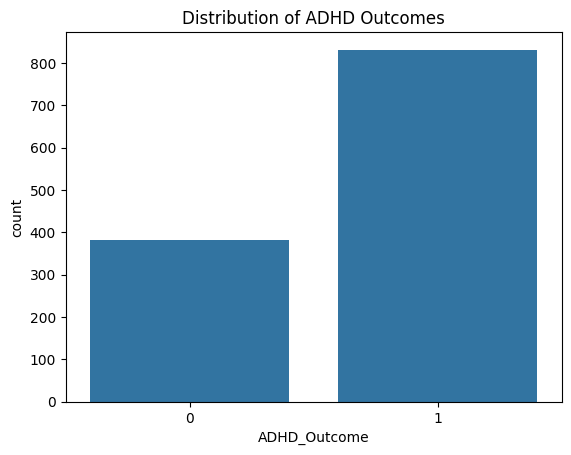

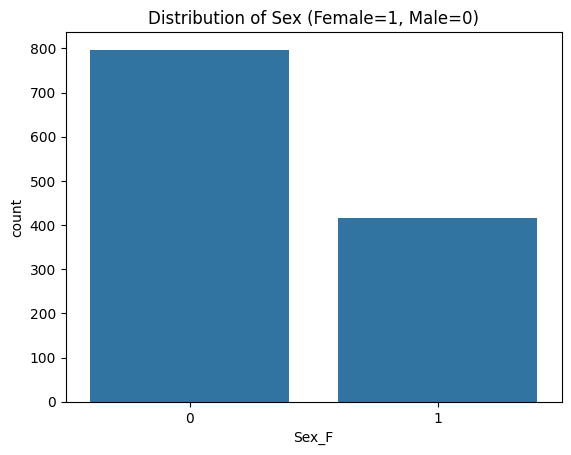

In [ ]:
# Distribution of target labels
sns.countplot(x="ADHD_Outcome", data=train_labels)
plt.title("Distribution of ADHD Outcomes")
plt.show()

sns.countplot(x="Sex_F", data=train_labels)
plt.title("Distribution of Sex (Female=1, Male=0)")
plt.show()

In [ ]:
# this code turns the partipant_id from object to numeric. which would cause problem later while merging different datasets based on
# participant ID
#non_numeric_cols = train_quantitative.select_dtypes(exclude=['number']).columns
#print("Non-numeric columns:", non_numeric_cols)
#train_quantitative[non_numeric_cols] = train_quantitative[non_numeric_cols].apply(pd.to_numeric, errors='coerce')
#train_quantitative.fillna(train_quantitative.median(), inplace=True)

In [ ]:
print(train_quantitative.dtypes)

participant_id                 object
EHQ_EHQ_Total                 float64
ColorVision_CV_Score          float64
APQ_P_APQ_P_CP                float64
APQ_P_APQ_P_ID                float64
APQ_P_APQ_P_INV               float64
APQ_P_APQ_P_OPD               float64
APQ_P_APQ_P_PM                float64
APQ_P_APQ_P_PP                float64
SDQ_SDQ_Conduct_Problems      float64
SDQ_SDQ_Difficulties_Total    float64
SDQ_SDQ_Emotional_Problems    float64
SDQ_SDQ_Externalizing         float64
SDQ_SDQ_Generating_Impact     float64
SDQ_SDQ_Hyperactivity         float64
SDQ_SDQ_Internalizing         float64
SDQ_SDQ_Peer_Problems         float64
SDQ_SDQ_Prosocial             float64
MRI_Track_Age_at_Scan         float64
dtype: object


In [ ]:
# Fill missing values in categorical data
train_categorical.fillna(train_categorical.mode().iloc[0], inplace=True)

#train_quantitative.fillna(train_quantitative.median(), inplace=True)

numeric_columns = train_quantitative.select_dtypes(include=['number'])
# Fill missing values in numeric data with the median
train_quantitative[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())


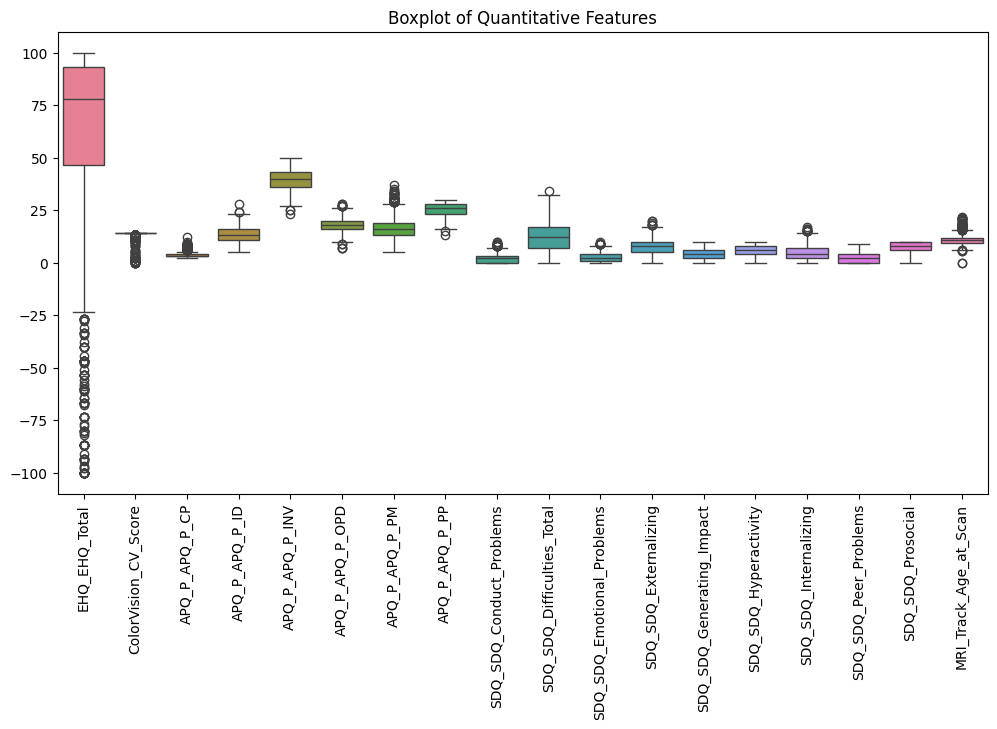

In [ ]:
import seaborn as sns

# Box plot for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_quantitative)
plt.xticks(rotation=90)
plt.title("Boxplot of Quantitative Features")
plt.show()

In [ ]:
# Check for duplicates
print("Duplicate rows in train_categorical:", train_categorical.duplicated().sum())
print("Duplicate rows in train_quantitative:", train_quantitative.duplicated().sum())

Duplicate rows in train_categorical: 0
Duplicate rows in train_quantitative: 0


In [ ]:
# If age is in the dataset, check for negatives
if 'Age' in train_quantitative.columns:
    print("Negative Age Values:\n", train_quantitative[train_quantitative['Age'] < 0])

    # Replace negative ages with median age
    train_quantitative['Age'] = train_quantitative['Age'].apply(lambda x: train_quantitative['Age'].median() if x < 0 else x)

In [ ]:
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
    return df

clean_column_names(train_connectome)
clean_column_names(train_categorical)
clean_column_names(train_quantitative)
clean_column_names(train_labels)

,participant_id,adhd_outcome,sex_f
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1
...,...,...,...
1208,Atx7oub96GXS,0,0
1209,groSbUfkQngM,0,1
1210,zmxGvIrOD0bt,0,1
1211,rOmWFuJCud5G,0,0


In [ ]:
#from sklearn.preprocessing import LabelEncoder, StandardScaler
#caler = StandardScaler()
#train_quantitative_scaled = pd.DataFrame(scaler.fit_transform(train_quantitative), columns=train_quantitative.columns)

In [ ]:
# output train_connectome columns
print(train_connectome.columns)

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)


In [ ]:
# output train_categorical columns
print(train_categorical.columns)

Index(['participant_id', 'basic_demos_enroll_year', 'basic_demos_study_site',
       'preint_demos_fam_child_ethnicity', 'preint_demos_fam_child_race',
       'mri_track_scan_location', 'barratt_barratt_p1_edu',
       'barratt_barratt_p1_occ', 'barratt_barratt_p2_edu',
       'barratt_barratt_p2_occ'],
      dtype='object')


In [ ]:
# output train_quantitative columns
print(train_quantitative.columns)

Index(['participant_id', 'ehq_ehq_total', 'colorvision_cv_score',
       'apq_p_apq_p_cp', 'apq_p_apq_p_id', 'apq_p_apq_p_inv',
       'apq_p_apq_p_opd', 'apq_p_apq_p_pm', 'apq_p_apq_p_pp',
       'sdq_sdq_conduct_problems', 'sdq_sdq_difficulties_total',
       'sdq_sdq_emotional_problems', 'sdq_sdq_externalizing',
       'sdq_sdq_generating_impact', 'sdq_sdq_hyperactivity',
       'sdq_sdq_internalizing', 'sdq_sdq_peer_problems', 'sdq_sdq_prosocial',
       'mri_track_age_at_scan'],
      dtype='object')


In [ ]:
# output train_labels columns
print(train_labels.columns)

Index(['participant_id', 'adhd_outcome', 'sex_f'], dtype='object')


In [ ]:
# there are the same participant ids in the 'participant_id' column of all four training datasets
print(set(train_connectome['participant_id']) == set(train_categorical['participant_id']))
print(set(train_connectome['participant_id']) == set(train_quantitative['participant_id']))
print(set(train_connectome['participant_id']) == set(train_labels['participant_id']))

# merge all of the datasets on participant_id ~ outer to keep all participants
train_merged = pd.merge(train_connectome, train_quantitative, on='participant_id', how='outer')
train_merged = pd.merge(train_merged, train_categorical, on='participant_id', how='outer')
train_merged = pd.merge(train_merged, train_labels, on='participant_id', how='outer')

True
True
True


In [ ]:
# output merged training DataFrame columns
print(train_merged.columns)

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       'basic_demos_study_site', 'preint_demos_fam_child_ethnicity',
       'preint_demos_fam_child_race', 'mri_track_scan_location',
       'barratt_barratt_p1_edu', 'barratt_barratt_p1_occ',
       'barratt_barratt_p2_edu', 'barratt_barratt_p2_occ', 'adhd_outcome',
       'sex_f'],
      dtype='object', length=19930)


In [ ]:
print(train_merged.isnull().sum().sum())

0


In [ ]:
train_merged.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,basic_demos_study_site,preint_demos_fam_child_ethnicity,preint_demos_fam_child_race,mri_track_scan_location,barratt_barratt_p1_edu,barratt_barratt_p1_occ,barratt_barratt_p2_edu,barratt_barratt_p2_occ,adhd_outcome,sex_f
0,00aIpNTbG5uh,0.361339,0.791402,0.530706,0.623133,0.845830,0.680234,0.537144,0.387455,0.498571,...,4,1.0,0.0,3.0,21.0,45.0,21.0,45.0,1,0
1,00fV0OyyoLfw,0.051430,0.613198,0.635255,0.391237,0.451225,0.600475,0.420935,0.234825,0.322048,...,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0,1,0
2,04X1eiS79T4B,-0.305747,0.750316,-0.005342,0.458421,0.757530,0.756288,0.799046,0.622567,0.659165,...,1,1.0,2.0,2.0,9.0,0.0,21.0,45.0,0,1
3,05ocQutkURd6,0.450442,0.731530,0.799147,0.701688,0.747468,0.523304,0.575033,0.187189,0.441150,...,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,1
4,06YUNBA9ZRLq,0.415220,0.585700,0.355835,0.664142,0.683491,0.380201,0.375091,0.212314,0.445294,...,1,0.0,1.0,2.0,12.0,0.0,21.0,45.0,1,0


In [ ]:
# Make predictions on test data
test_merged = pd.merge(test_connectome, test_quantitative, on='participant_id', how='outer')
test_merged = pd.merge(test_merged, test_categorical, on='participant_id', how='outer')
# Fill NaN values with median only for numeric columns
test_merged.fillna(test_merged.select_dtypes(exclude='object').median(), inplace=True)

test_merged.head()


,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,MRI_Track_Age_at_Scan,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,06HFIpqKfXy9,0.373771,0.855115,0.330239,0.719286,0.835315,0.734013,0.390741,0.080668,0.363793,...,12.669290,2022,4,0.0,0.0,4,18.0,0.0,6.0,45.0
1,0Dua0TUw4sNZ,0.493368,0.588468,0.363014,0.205424,0.274703,0.608903,0.481908,0.328561,0.447169,...,8.329796,2022,4,0.0,0.0,3,21.0,40.0,18.0,35.0
2,0ImS6uhE3Ie9,-0.016247,0.380789,0.043093,0.564781,0.604160,0.626526,0.556659,0.442066,0.573229,...,15.270134,2022,4,0.0,0.0,4,21.0,45.0,21.0,45.0
3,0VHL9SCh2TfC,-0.087106,0.801078,0.583310,0.468332,0.621170,0.796355,0.735853,0.333285,0.686328,...,10.755418,2022,4,0.0,0.0,4,18.0,0.0,15.0,30.0
4,0X2H4LroxZcw,0.505093,0.621970,0.396349,0.149691,0.304107,0.271846,0.231697,-0.044955,0.292622,...,9.517796,2022,4,0.0,0.0,4,21.0,40.0,21.0,35.0


In [ ]:
test_merged.fillna(test_merged.median(), inplace=True)

#Align test dataset with training columns (important if different categorical features exist)
test_merged = test_merged.reindex(columns=X.columns, fill_value=0)

print(f"Number of participants in test data: {test_merged.shape[0]}")

**LightGBM Model**


In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import RobustScaler

# Load Data
train_data = train_merged.copy()

# Define Features & Target
features = [col for col in train_data.columns if col not in ['participant_id', 'sex_f', 'adhd_outcome']]
X = train_data[features].copy()
y_sex = train_data['sex_f']

# Handle Missing Values
X.fillna(X.median(), inplace=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_sex, test_size=0.2, random_state=42, stratify=y_sex)

# Define LightGBM Model with Optimized Parameters
lgb_params = {
    'n_estimators': 100,
    'learning_rate': 0.05,
    'max_depth': 6,
    'num_leaves': 31,
    'random_state': 42,
    'n_jobs': -1,
    'metric': 'f1'
}

# Create a Pipeline (Include Feature Selection)
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_classif, k=50)),
    ('scaler', RobustScaler()),
    ('classifier', lgb.LGBMClassifier(**lgb_params))
])

# Train Final Model
pipeline.fit(X_train, y_train)

# Evaluate Performance on Test Data
y_pred_sex = pipeline.predict(X_test)
acc_sex = accuracy_score(y_test, y_pred_sex)
f1_sex = f1_score(y_test, y_pred_sex)
print(f"Gender Model - Accuracy: {acc_sex:.4f}, F1 Score: {f1_sex:.4f}")

# Align test dataset with training columns
test_features = test_merged.reindex(columns=X.columns, fill_value=0)

# Make predictions on the full test set
test_predictions_sex = pipeline.predict(test_features)

# Save Predictions to CSV File with all test participants
gender_predictions = pd.DataFrame({'participant_id': test_merged['participant_id'], 'Sex_F': test_predictions_sex})
gender_predictions.to_csv('gender_predictions.csv', index=False)

print(f"Number of rows in Gender predictions: {gender_predictions.shape[0]}")


/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:865: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  _X, _y = _LGBMCheckXY(X, y, accept_sparse=True, force_all_finite=False, ensure_min_samples=2)


[LightGBM] [Info] Number of positive: 333, number of negative: 637
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343299 -> initscore=-0.648627
[LightGBM] [Info] Start training from score -0.648627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:1007: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  X = _LGBMCheckArray(X, accept_sparse=True, force_all_finite=False)
/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:1007: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  X = _LGBMCheckArray(X, accept_sparse=True, force_all_finite=False)


In [ ]:
print(f"Number of participants in test data: {X_test.shape[0]}")


Number of participants in test data: 243


In [ ]:
# ADHD Prediction Model
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import RobustScaler

# Load Data
train_data = train_merged.copy()

# Define Features & Target
features = [col for col in train_data.columns if col not in ['participant_id', 'sex_f', 'adhd_outcome']]
X = train_data[features].copy()
y_adhd = train_data['adhd_outcome']

# Handle Missing Values
X.fillna(X.median(), inplace=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_adhd, test_size=0.2, random_state=42, stratify=y_adhd)

# Define LightGBM Model with Optimized Parameters
lgb_params = {
    'n_estimators': 120,
    'learning_rate': 0.03,
    'max_depth': 8,
    'num_leaves': 40,
    'random_state': 42,
    'n_jobs': -1,
    'metric': 'auc'
}

# Create a Pipeline (Include Feature Selection)
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_classif, k=50)),
    ('scaler', RobustScaler()),
    ('classifier', lgb.LGBMClassifier(**lgb_params))
])

# Train Final Model
pipeline.fit(X_train, y_train)

# Evaluate Performance on Test Data
y_pred_adhd = pipeline.predict(X_test)
auc_adhd = roc_auc_score(y_test, y_pred_adhd)
f1_adhd = f1_score(y_test, y_pred_adhd)
print(f"ADHD Model - AUC: {auc_adhd:.4f}, F1 Score: {f1_adhd:.4f}")

# Align test dataset with training columns
test_features = test_merged.reindex(columns=X.columns, fill_value=0)

# Make predictions on the full test set
test_predictions_adhd = pipeline.predict(test_features)

# Save Predictions to CSV File with all test participants
adhd_predictions = pd.DataFrame({'participant_id': test_merged['participant_id'], 'ADHD_Outcome': test_predictions_adhd})
adhd_predictions.to_csv('adhd_predictions.csv', index=False)

print(f"Number of rows in ADHD predictions: {adhd_predictions.shape[0]}")


/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:865: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  _X, _y = _LGBMCheckXY(X, y, accept_sparse=True, force_all_finite=False, ensure_min_samples=2)


[LightGBM] [Info] Number of positive: 665, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9622
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685567 -> initscore=0.779475
[LightGBM] [Info] Start training from score 0.779475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:1007: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  X = _LGBMCheckArray(X, accept_sparse=True, force_all_finite=False)
/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:1007: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  X = _LGBMCheckArray(X, accept_sparse=True, force_all_finite=False)


In [ ]:
# Evaluate Performance for Gender Model
y_pred_sex = pipeline.predict(X_test)  # Predictions on train-test split
acc_sex = accuracy_score(y_test, y_pred_sex)
f1_sex = f1_score(y_test, y_pred_sex)
print(f"Gender Model - Accuracy: {acc_sex:.4f}, F1 Score: {f1_sex:.4f}")

# Evaluate Performance for ADHD Model
y_pred_adhd = pipeline.predict(X_test)  # Predictions on train-test split
auc_adhd = roc_auc_score(y_test, y_pred_adhd)
f1_adhd = f1_score(y_test, y_pred_adhd)
print(f"ADHD Model - AUC: {auc_adhd:.4f}, F1 Score: {f1_adhd:.4f}")


Gender Model - Accuracy: 0.8025, F1 Score: 0.8652
ADHD Model - AUC: 0.7301, F1 Score: 0.8652


/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:1007: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  X = _LGBMCheckArray(X, accept_sparse=True, force_all_finite=False)
/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:1007: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  X = _LGBMCheckArray(X, accept_sparse=True, force_all_finite=False)


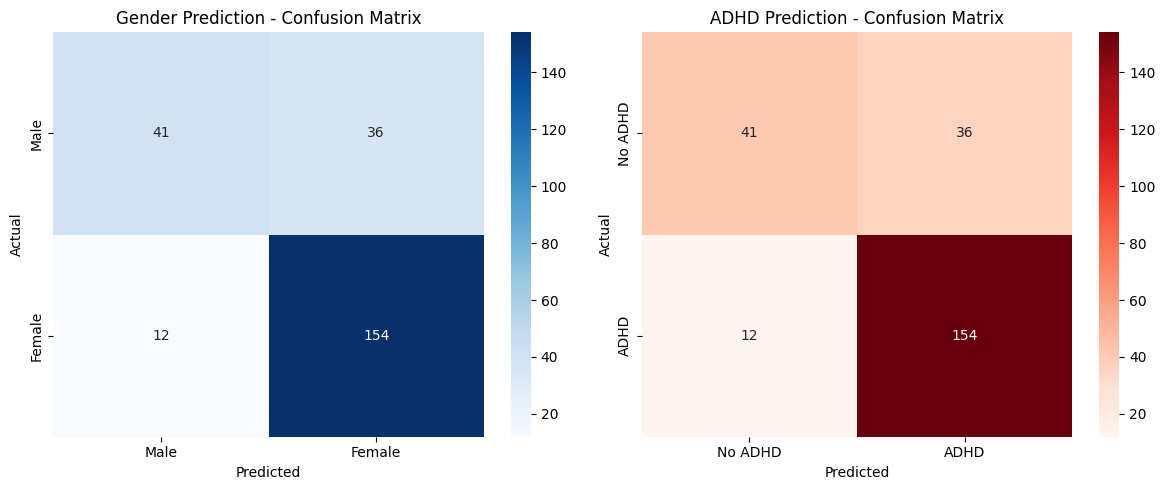

/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:1007: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  X = _LGBMCheckArray(X, accept_sparse=True, force_all_finite=False)
/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:1007: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  X = _LGBMCheckArray(X, accept_sparse=True, force_all_finite=False)


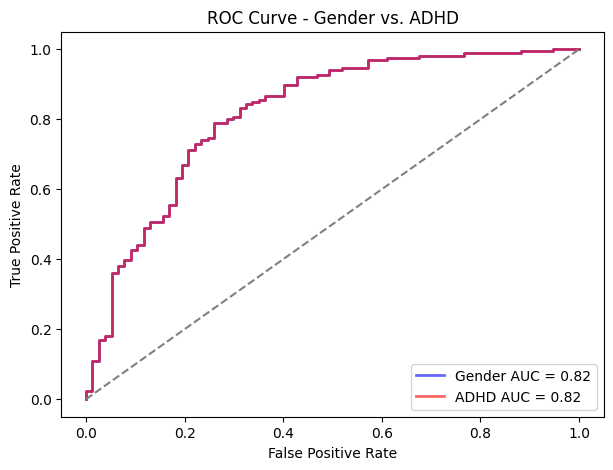

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Side-by-Side Confusion Matrices (Gender & ADHD)
def plot_confusion_matrices(y_true1, y_pred1, y_true2, y_pred2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    cm1 = confusion_matrix(y_true1, y_pred1)
    sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'], ax=axes[0])
    axes[0].set_title("Gender Prediction - Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    cm2 = confusion_matrix(y_true2, y_pred2)
    sns.heatmap(cm2, annot=True, fmt="d", cmap="Reds", xticklabels=['No ADHD', 'ADHD'], yticklabels=['No ADHD', 'ADHD'], ax=axes[1])
    axes[1].set_title("ADHD Prediction - Confusion Matrix")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

plot_confusion_matrices(y_test, y_pred_sex, y_test, y_pred_adhd)

# Overlayed ROC Curves (Gender & ADHD)
def plot_roc_curves(y_true1, y_probs1, y_true2, y_probs2):
    fpr1, tpr1, _ = roc_curve(y_true1, y_probs1)
    roc_auc1 = auc(fpr1, tpr1)

    fpr2, tpr2, _ = roc_curve(y_true2, y_probs2)
    roc_auc2 = auc(fpr2, tpr2)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr1, tpr1, color="blue", alpha=0.6, lw=2, label=f"Gender AUC = {roc_auc1:.2f}")
    plt.plot(fpr2, tpr2, color="red", alpha=0.6, lw=2, label=f"ADHD AUC = {roc_auc2:.2f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Gender vs. ADHD")
    plt.legend(loc="lower right")
    plt.show()

y_probs_sex = pipeline.predict_proba(X_test)[:, 1]  # Get probability scores
y_probs_adhd = pipeline.predict_proba(X_test)[:, 1]  # Get probability scores

plot_roc_curves(y_test, y_probs_sex, y_test, y_probs_adhd)




In [ ]:
import pandas as pd

# Load the saved prediction files
gender_predictions = pd.read_csv('gender_predictions.csv')
adhd_predictions = pd.read_csv('adhd_predictions.csv')

# Merge both predictions on 'participant_id'
merged_preds = pd.merge(adhd_predictions, gender_predictions, on='participant_id', how='outer')

# Save merged predictions to CSV
merged_preds.to_csv('submission.csv', index=False)

print("Merged predictions saved as 'submission.csv'.")
merged_preds.head()

Merged predictions saved as 'submission.csv'.


,participant_id,ADHD_Outcome,Sex_F
0,06HFIpqKfXy9,0,0
1,0Dua0TUw4sNZ,0,0
2,0ImS6uhE3Ie9,0,0
3,0VHL9SCh2TfC,0,0
4,0X2H4LroxZcw,0,0


In [ ]:
# Save merged predictions to CSV
merged_preds.to_csv('submission.csv', index=False)

print("Merged predictions saved as 'submission.csv'.")
merged_preds.head()


Merged predictions saved as 'submission.csv'.


,participant_id,ADHD_Outcome,Sex_F
0,00fV0OyyoLfw,NaN,0.0
1,04X1eiS79T4B,NaN,1.0
2,05ocQutkURd6,0.0,NaN
3,0Hthz5IFXhpw,1.0,1.0
4,0JhQVAT7btJ5,NaN,1.0
